In [1]:
import pandas as pd
df = pd.read_csv("../data/event_operations_data.csv")
df.head()

,event_id,event_name,event_type,event_date,venue_type,weather_condition,expected_attendance,actual_attendance,budget_allocated,actual_spend,num_organisers,event_duration_hours,feedback_score
0,E001,Freshmen Networking,Networking,8/15/2025,Indoor,Clear,120,135,3000,2800.00,12,3,4.2
1,E002,Arts Camp,Camp,6/10/2025,Outdoor,Clear,280,260,9000,9800.00,28,10,4.0
2,E003,Studio Performance Night,Performance,9/5/2025,Indoor,Rainy,180,200,5000,5200.00,18,4,4.5
3,E004,Freshmen Networking Night,Networking,11/24/2025,Indoor,Clear,161,172,3003,3595.47,20,3,4.0
4,E005,Alumni Networking Session,Networking,1/13/2025,Outdoor,Clear,155,133,2895,3388.32,18,4,4.1


In [2]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   event_id              40 non-null     str    
 1   event_name            40 non-null     str    
 2   event_type            40 non-null     str    
 3   event_date            40 non-null     str    
 4   venue_type            40 non-null     str    
 5   weather_condition     40 non-null     str    
 6   expected_attendance   40 non-null     int64  
 7   actual_attendance     40 non-null     int64  
 8   budget_allocated      40 non-null     int64  
 9   actual_spend          40 non-null     float64
 10  num_organisers        40 non-null     int64  
 11  event_duration_hours  40 non-null     int64  
 12  feedback_score        40 non-null     float64
dtypes: float64(2), int64(5), str(6)
memory usage: 4.2 KB


Data Cleaning & Preparation

In [3]:
# Check for missing values
df.isnull().sum()

event_id                0
event_name              0
event_type              0
event_date              0
venue_type              0
weather_condition       0
expected_attendance     0
actual_attendance       0
budget_allocated        0
actual_spend            0
num_organisers          0
event_duration_hours    0
feedback_score          0
dtype: int64

In [4]:
# Convert 'event_date' to datetime
df['event_date'] = pd.to_datetime(df['event_date'])

Derived Metrics

In [5]:
df["attendance_rate"] = df["actual_attendance"] / df["expected_attendance"]
df["budget_variance"] = df["actual_spend"] - df["budget_allocated"]
df["cost_per_attendee"] = df["actual_spend"] / df["actual_attendance"]

df[[
    "event_name",
    "attendance_rate",
    "budget_variance",
    "cost_per_attendee"
]].head()

,event_name,attendance_rate,budget_variance,cost_per_attendee
0,Freshmen Networking,1.125000,-200.00,20.740741
1,Arts Camp,0.928571,800.00,37.692308
2,Studio Performance Night,1.111111,200.00,26.000000
3,Freshmen Networking Night,1.068323,592.47,20.903895
4,Alumni Networking Session,0.858065,493.32,25.476090


Overall KPIs

In [6]:
summary = {
    "total_events": df.shape[0],
    "avg_attendance_rate": df["attendance_rate"].mean(),
    "percent_events_over_budget": (df["budget_variance"] > 0).sum() / len(df) * 100
}

summary

{'total_events': 40,
 'avg_attendance_rate': np.float64(0.9857398152313394),
 'percent_events_over_budget': np.float64(62.5)}

In [7]:
event_type_summary = df.groupby("event_type").agg({
    "attendance_rate": "mean",
    "budget_variance": "mean",
    "cost_per_attendee": "mean",
    "event_id": "count"
}).rename(columns={"event_id": "num_events"})

event_type_summary

,attendance_rate,budget_variance,cost_per_attendee,num_events
event_type,,,,
Camp,0.971607,287.258333,40.582298,6
Networking,0.965235,325.632222,28.330766,9
Outreach Events,0.948900,-15.096250,39.794458,8
Performance,1.043694,56.845714,31.827846,7
Workshop,1.001578,50.073000,20.653734,10


In [10]:
%pip install matplotlib

  Using cached matplotlib-3.10.8-cp314-cp314-win_amd64.whl.metadata (52 kB)
  Using cached contourpy-1.3.3-cp314-cp314-win_amd64.whl.metadata (5.5 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.61.1-cp314-cp314-win_amd64.whl.metadata (116 kB)
  Using cached kiwisolver-1.4.9-cp314-cp314-win_amd64.whl.metadata (6.4 kB)
  Using cached pyparsing-3.3.2-py3-none-any.whl.metadata (5.8 kB)
Using cached matplotlib-3.10.8-cp314-cp314-win_amd64.whl (8.3 MB)
Using cached contourpy-1.3.3-cp314-cp314-win_amd64.whl (232 kB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
Using cached fonttools-4.61.1-cp314-cp314-win_amd64.whl (2.3 MB)
Using cached kiwisolver-1.4.9-cp314-cp314-win_amd64.whl (75 kB)
   ---------------------------------------- 0.0/7.2 MB ? eta -:--:--
   - -------------------------------------- 0.3/7.2 MB ? eta -:--:--
   ----- ---------------------------------- 1.0/7.2 MB 5.1 MB/s eta 0:00:02
   ----------- --------------------------

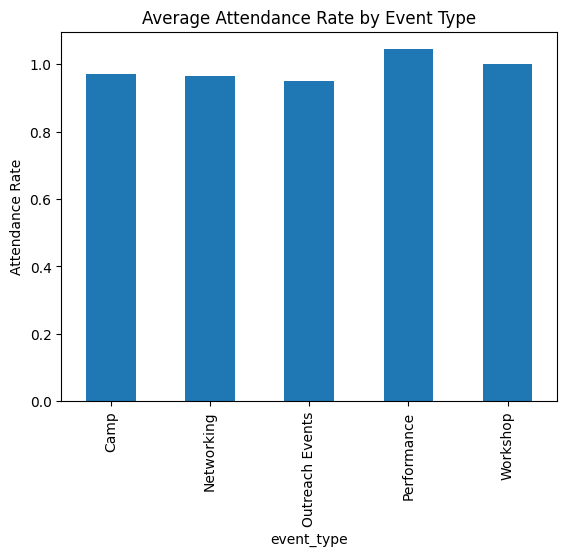

In [11]:
import matplotlib.pyplot as plt

df.groupby("event_type")["attendance_rate"].mean().plot(kind="bar")
plt.title("Average Attendance Rate by Event Type")
plt.ylabel("Attendance Rate")
plt.show()

In [12]:
# Save the enriched dataset to use for data dashboard
df.to_csv("../data/event_operations_enriched.csv", index=False)